<a href="https://colab.research.google.com/github/Ashik9576/Live-Class-Monitoring-System-Face-emotion-Recognition-/blob/main/Face_Emotion_Recognition_Ashik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Introduction**

The Indian education landscape has been undergoing rapid changes for the past 10 years owing to
the advancement of web-based learning services, specifically, eLearning platforms.
Global E-learning is estimated to witness an 8X over the next 5 years to reach USD 2B in 2021. India
is expected to grow with a CAGR of 44% crossing the 10M users mark in 2021. Although the market
is growing on a rapid scale, there are major challenges associated with digital learning when
compared with brick and mortar classrooms. One of many challenges is how to ensure quality
learning for students. Digital platforms might overpower physical classrooms in terms of content
quality but when it comes to understanding whether students are able to grasp the content in a live
class scenario is yet an open-end challenge.
In a physical classroom during a lecturing teacher can see the faces and assess the emotion of the
class and tune their lecture accordingly, whether he is going fast or slow. He can identify students who

need special attention. Digital classrooms are conducted via video telephony software program (ex-
Zoom) where it’s not possible for medium scale class (25-50) to see all students and access the

mood. Because of this drawback, students are not focusing on content due to lack of surveillance.
While digital platforms have limitations in terms of physical surveillance but it comes with the power of
data and machines which can work for you. It provides data in the form of video, audio, and texts
which can be analysed using deep learning algorithms. Deep learning backed system not only solves
the surveillance issue, but it also removes the human bias from the system, and all information is no
longer in the teacher’s brain rather translated in numbers that can be analysed and tracked.

# **Problem Statements**

We will solve the above-mentioned challenge by applying deep learning algorithms to live video data.
The solution to this problem is by recognizing facial emotions.

# **Face Emotion Recognition**

This is a few shot learning live face emotion detection system. The model should be able to real-time
identify the emotions of students in a live class.

# **Importing Libraries**

In [ ]:
#installing opencv library
!pip install opencv_python

In [ ]:
#importing required libraries
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
### CNN models ###
import keras
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.callbacks import CSVLogger, ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, SeparableConv2D
from keras.utils import np_utils
from keras.regularizers import l2
from keras import models
from keras.utils.vis_utils import plot_model
from keras.layers import Input, GlobalAveragePooling2D,concatenate
from keras.models import Model
from tensorflow.keras import layers
from keras.applications.inception_v3 import InceptionV3
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
import sys, os
import pandas as pd
import numpy as np
import math
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.losses import categorical_crossentropy
# from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import ReduceLROnPlateau, TensorBoard, EarlyStopping, ModelCheckpoint
from keras.models import load_model
from matplotlib import pyplot


# **Inspect the Data in First Look**

In [ ]:
# mounting drive with google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Image Reading
img=cv2.imread("/content/drive/MyDrive/Live Class Monitoring System [Face emotion Recognition]/img.jpg")

In [ ]:
#image array
img.shape

(1620, 996, 3)

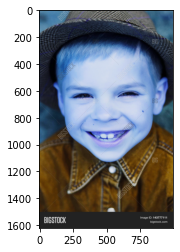

In [ ]:
#show the image 
plt.imshow(img)

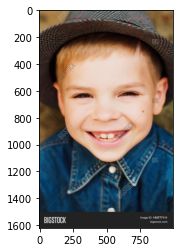

In [ ]:
#changing the color rgb
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

# **Recognize Face directly using Deepface**

In [ ]:
#installing deepface library for identify human faces in digital images.
!pip install deepface

In [ ]:
#import deepface 
from deepface import DeepFace

In [ ]:
# storing the all values in predictions after analyzing the image
predictions=DeepFace.analyze(img)

Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.90it/s]


In [ ]:
# a disc is stored in predicions which has all key and values
predictions

{'age': 21,
 'dominant_emotion': 'happy',
 'dominant_race': 'white',
 'emotion': {'angry': 2.1952372645378526e-10,
  'disgust': 3.039407795237014e-14,
  'fear': 5.1900202885368785e-09,
  'happy': 99.99994039535522,
  'neutral': 5.7416855270275846e-05,
  'sad': 1.6376400235884603e-07,
  'surprise': 1.6094032573646389e-10},
 'gender': 'Man',
 'race': {'asian': 0.1705694623916492,
  'black': 0.006419880045117209,
  'indian': 0.034430275524896324,
  'latino hispanic': 13.291236663909356,
  'middle eastern': 3.1775686827220104,
  'white': 83.31977327826341},
 'region': {'h': 763, 'w': 763, 'x': 98, 'y': 333}}

In [ ]:
faceCascade=cv2.CascadeClassifier( cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

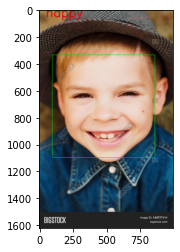

In [ ]:
#detecting the face and writing the dominants
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces= faceCascade.detectMultiScale(gray,1.1,4)

for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y),(x+w,y+h),(0,225,0),2)

#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,predictions['dominant_emotion'],
                 (50,50),
                  font,3,
                  (0,0,225),
                   6,cv2.LINE_AA);

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

**Wow! we detected the face that is happy.**

# **Loading Dataset and analysing**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Live Class Monitoring System [Face emotion Recognition]/face_data.csv")

In [ ]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
## shape of the dataset
df.shape

(35887, 3)

In [ ]:
## checking for null values

df.isnull().sum()


emotion    0
pixels     0
Usage      0
dtype: int64

In [ ]:
# Value counts on each set
df["Usage"].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

In [ ]:
# Value counts on each set
df["emotion"].value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [ ]:
#unique emotion
df.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1])

In [ ]:
#lable of different emotion
emotion_label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}

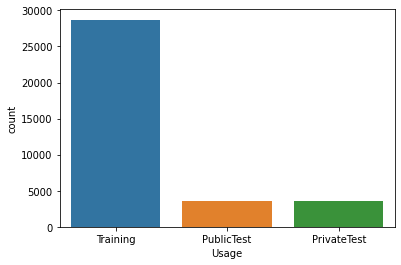

In [ ]:
# Let's plot the count of each set
sns.countplot(df.Usage)
plt.show()

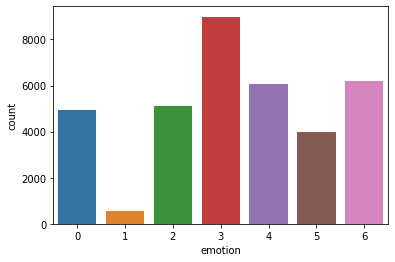

In [ ]:
#plot for value count
sns.countplot(df.emotion)
pyplot.show()

Our dataset have 7 types of emotion ranging form 0-6:

0 ->  Anger,  1 -> Disgust,2 -> Fear, 3 -> Happiness, 4 -> Sad, 5 -> Surprise, 6 -> Neutral

After looking bar plot we can observe that majority of the classes belongs to 3:Happy, 4:Sad *and *6:Neutral on the otherside 0:anger, 2: Sad and 5:surprise are avarage and 1:disgust is very low in number 

In [ ]:
#pixel value of image
math.sqrt(len(df.pixels[0].split(' ')))

48.0

# **Displaying Imgages**

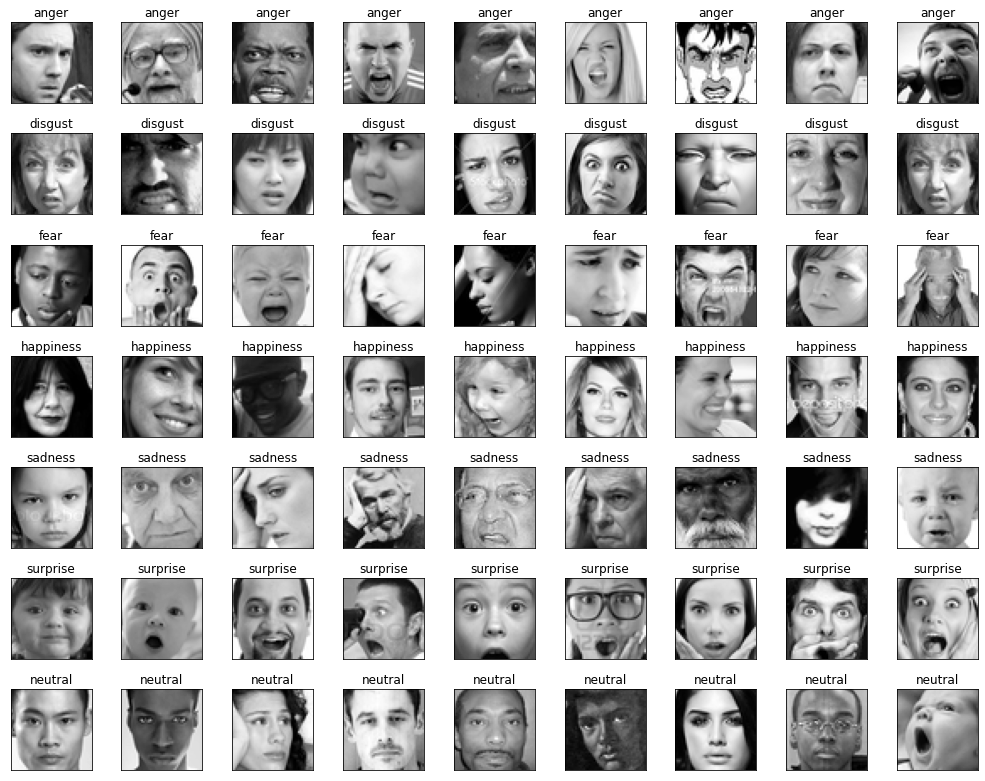

In [ ]:
# size of the image: 48*48 pixels

fig = pyplot.figure(1, (14, 14))

k = 0
for label in sorted(df.emotion.unique()):
    for j in range(9):
        px = df[df.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')

        k += 1
        ax = pyplot.subplot(9, 9, k)
        ax.imshow(px, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(emotion_label_to_text[label])
        pyplot.tight_layout()

Now prepare data for campatible for neural network

#**Parameters**

In [ ]:
# Defining the parameters used in this project
batch_size = 32
num_epochs = 50
input_shape = (48, 48, 1)
validation_split = .2
verbose = 1
num_classes = 7
base_path = 'models/'
shape_x = 48
shape_y = 48
image_size=(48,48)

# **Prepocessing**

In [ ]:
#image processing
df['pixels']=df['pixels'].astype("string")
pixels = df['pixels'].tolist()
width, height = 48, 48
faces = []
for pixel_sequence in pixels:
    face = [int(pixel) for pixel in pixel_sequence.strip().split(' ',48*48)]
    face = np.asarray(face).reshape(width, height)
    face = cv2.resize(face.astype('uint8'),image_size)
    faces.append(face.astype('float32'))
faces = np.asarray(faces)
faces = np.expand_dims(faces, -1)
faces /= 127.5
faces -= 1.
emotions = pd.get_dummies(df['emotion']).to_numpy()

# **Splitting the data into training and validation set.**

In [ ]:
#dataset sp,it for training model 
X_train, X_valid, y_train, y_valid = train_test_split(faces,emotions,
                                                    shuffle=True,
                                                    test_size=0.2, random_state=42)
X_valid,X_test,y_valid,y_test=train_test_split(faces,emotions,test_size=0.2,shuffle=True)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape,X_test.shape,y_test.shape

((28709, 48, 48, 1),
 (28709, 48, 48, 1),
 (28709, 7),
 (28709, 7),
 (7178, 48, 48, 1),
 (7178, 7))

In [ ]:
#variable allocation
img_width = X_train.shape[1]
img_height = X_train.shape[2]
img_depth = X_train.shape[3]
num_classes = y_train.shape[1]

# **Data Augmentation**
"taking the batch and apply some series of random transformations (random rotation, resizing, shearing) to increase generalizability of model".

In [ ]:
# As the data in hand is less as compared to the task so ImageDataGenerator is good to go.
train_datagen = ImageDataGenerator(
    rotation_range=15,         # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.15,    # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.15,   # randomly shift images vertically (fraction of total height)
    shear_range=0.15,
    zoom_range=0.15,           # randomly zoom into images
    horizontal_flip=True,      # randomly flip images
)
train_datagen.fit(X_train)

# **2-Xception :**

In [ ]:
#function for input layer
def entry_flow(inputs) :
    
    x = Conv2D(32, 3, strides = 2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Conv2D(64,3,padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    previous_block_activation = x
    
    for size in [64, 128, 256] :
    
        x = Activation('relu')(x)
        x = SeparableConv2D(size, 3, padding='same')(x)
        x = BatchNormalization()(x)
    
        x = Activation('relu')(x)
        x = SeparableConv2D(size, 3, padding='same')(x)
        x = BatchNormalization()(x)
        
        x = MaxPooling2D(3, strides=2, padding='same')(x)
        
        residual = Conv2D(size, 1, strides=2, padding='same')(previous_block_activation)
        
        x = keras.layers.Add()([x, residual])
        previous_block_activation = x
    
    return x


In [ ]:
#function for middle flow
def middle_flow(x, num_blocks=8) :
    
    previous_block_activation = x
    
    for _ in range(num_blocks) :
    
        x = Activation('relu')(x)
        x = SeparableConv2D(256, 3, padding='same')(x)
        x = BatchNormalization()(x)
    
        x = Activation('relu')(x)
        x = SeparableConv2D(256, 3, padding='same')(x)
        x = BatchNormalization()(x)
        
        x = Activation('relu')(x)
        x = SeparableConv2D(256, 3, padding='same')(x)
        x = BatchNormalization()(x)
        
        x = keras.layers.Add()([x, previous_block_activation])
        previous_block_activation = x
    
    return x

In [ ]:
#function for output layer
def exit_flow(x, num_classes=7) :
    
    previous_block_activation = x
    
    x = Activation('relu')(x)
    x = SeparableConv2D(256, 3, padding='same')(x)
    x = BatchNormalization()(x)
    
    x = Activation('relu')(x)
    x = SeparableConv2D(1024, 3, padding='same')(x)
    x = BatchNormalization()(x)
    
    x = MaxPooling2D(3, strides=2, padding='same')(x)
    
    residual = Conv2D(1024, 1, strides=2, padding='same')(previous_block_activation)
    x = keras.layers.Add()([x, residual])
      
    x = Activation('relu')(x)
    x = SeparableConv2D(728, 3, padding='same')(x)
    x = BatchNormalization()(x)
    
    x = Activation('relu')(x)
    x = SeparableConv2D(1024, 3, padding='same')(x)
    x = BatchNormalization()(x)
    
    x = GlobalAveragePooling2D()(x)
    x = Dense(num_classes, activation='softmax')(x)
    
    return x

In [ ]:
#input or output for the model architechture
inputs = Input(shape=(shape_x, shape_y, 1))
outputs = exit_flow(middle_flow(entry_flow(inputs)))

In [ ]:
#model name
xception = Model(inputs, outputs,name="Xception")

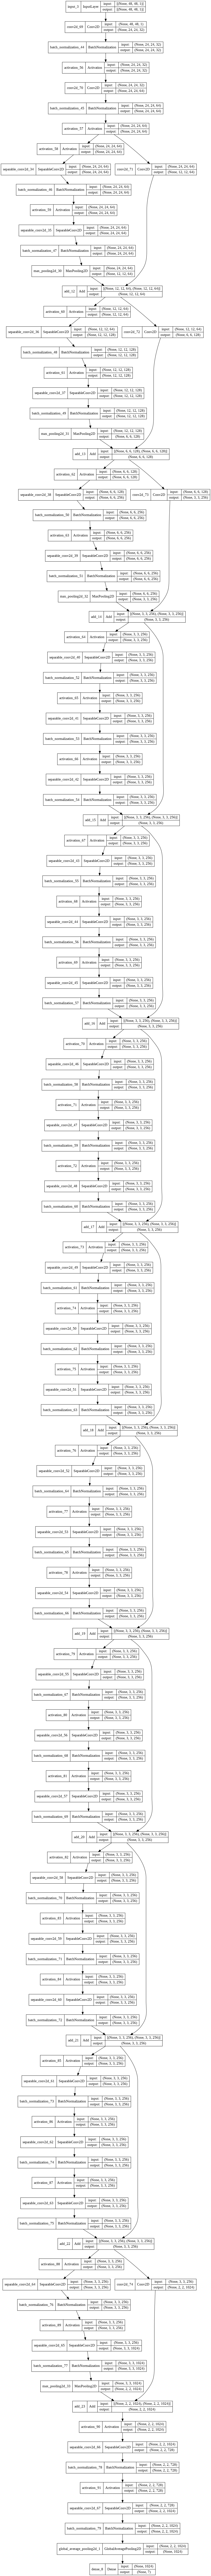

In [ ]:
#plot for architechture
plot_model(xception, to_file='xception.png', show_shapes=True, show_layer_names=True)

In [ ]:
#model compilation
xception.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
xception.summary()

Model: "Xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 48, 48, 1)]  0           []                               
                                                                                                  
 conv2d_69 (Conv2D)             (None, 24, 24, 32)   320         ['input_3[0][0]']                
                                                                                                  
 batch_normalization_44 (BatchN  (None, 24, 24, 32)  128         ['conv2d_69[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_56 (Activation)     (None, 24, 24, 32)   0           ['batch_normalization_44[0

# **3-Dexpression**

In [ ]:
#function for taking input for the layer
def dexpression():
    inputs = Input(shape=(shape_x, shape_y, 1))

    x = Conv2D(64, 7, strides = 2, padding='same')(inputs)
    x = Activation('relu')(x)
    x = MaxPooling2D(3, strides=2, padding='same')(x)
    x = BatchNormalization()(x)

    x_1 = Conv2D(96, 1, strides = 1, padding='same')(x)
    x_1 = Activation('relu')(x_1)
    x_1 = MaxPooling2D(3, strides=1, padding='same')(x_1)
    x_1 = BatchNormalization()(x_1)

    x_2 = Conv2D(208, 3, strides = 1, padding='same')(x_1)
    x_2 = Activation('relu')(x_2)
    x_2 = MaxPooling2D(3, strides=1, padding='same')(x_2)

    x_3 = Conv2D(64, 1, strides = 1, padding='same')(x_1)
    x_3 = Activation('relu')(x_3)
    x_3 = MaxPooling2D(3, strides=1, padding='same')(x_3)


    x_4=concatenate([x_2,x_3],axis=3)

    x_5 = Conv2D(96, 1, strides = 1, padding='same')(x_4)
    x_5 = Activation('relu')(x_5)
    x_5 = Conv2D(208, 3, strides = 1, padding='same')(x_5)
    x_5 = Activation('relu')(x_5)

    x_6 = MaxPooling2D(3, strides=1, padding='same')(x_4)
    x_6 = Activation('relu')(x_6)
    x_6 = Conv2D(64, 1, strides = 1, padding='same')(x_6)
    x_6 = Activation('relu')(x_6)
    x_6 = MaxPooling2D(3, strides=1, padding='same')(x_6)
    x_7 = concatenate([x_5,x_6],axis=3)

    x_8 = Flatten()(x_7)
    x_8 = Dropout(0.25)(x_8)
    x_8 = Dense(7, activation='softmax')(x_8)
    return Model(inputs, x_8,name='DeXpression')

In [ ]:
#model name 
dexpression=dexpression()

In [ ]:
#model compilation
dexpression.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
dexpression.summary()

Model: "DeXpression"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 48, 48, 1)]  0           []                               
                                                                                                  
 conv2d_75 (Conv2D)             (None, 24, 24, 64)   3200        ['input_4[0][0]']                
                                                                                                  
 activation_92 (Activation)     (None, 24, 24, 64)   0           ['conv2d_75[0][0]']              
                                                                                                  
 max_pooling2d_34 (MaxPooling2D  (None, 12, 12, 64)  0           ['activation_92[0][0]']          
 )                                                                                      

# **4: CNN :**
Modelling

In [ ]:
# Building up Model Architecture
def CNN():
    model = Sequential()

    #1st CNN layer
    model.add(Conv2D(64,(3,3),padding = 'same', name='image_array', input_shape = (48,48,1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(0.25))

    #2nd CNN layer
    model.add(Conv2D(128,(5,5),padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout (0.25))

    #3rd CNN layer
    model.add(Conv2D(512,(3,3),padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout (0.25))

    #4th CNN layer
    model.add(Conv2D(512,(3,3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())

    #Fully connected 1st layer
    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))


    # Fully connected layer 2nd layer
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    model.add(Dense(num_classes, activation='softmax'))

    return model

In [ ]:
#model name
CNN=CNN()

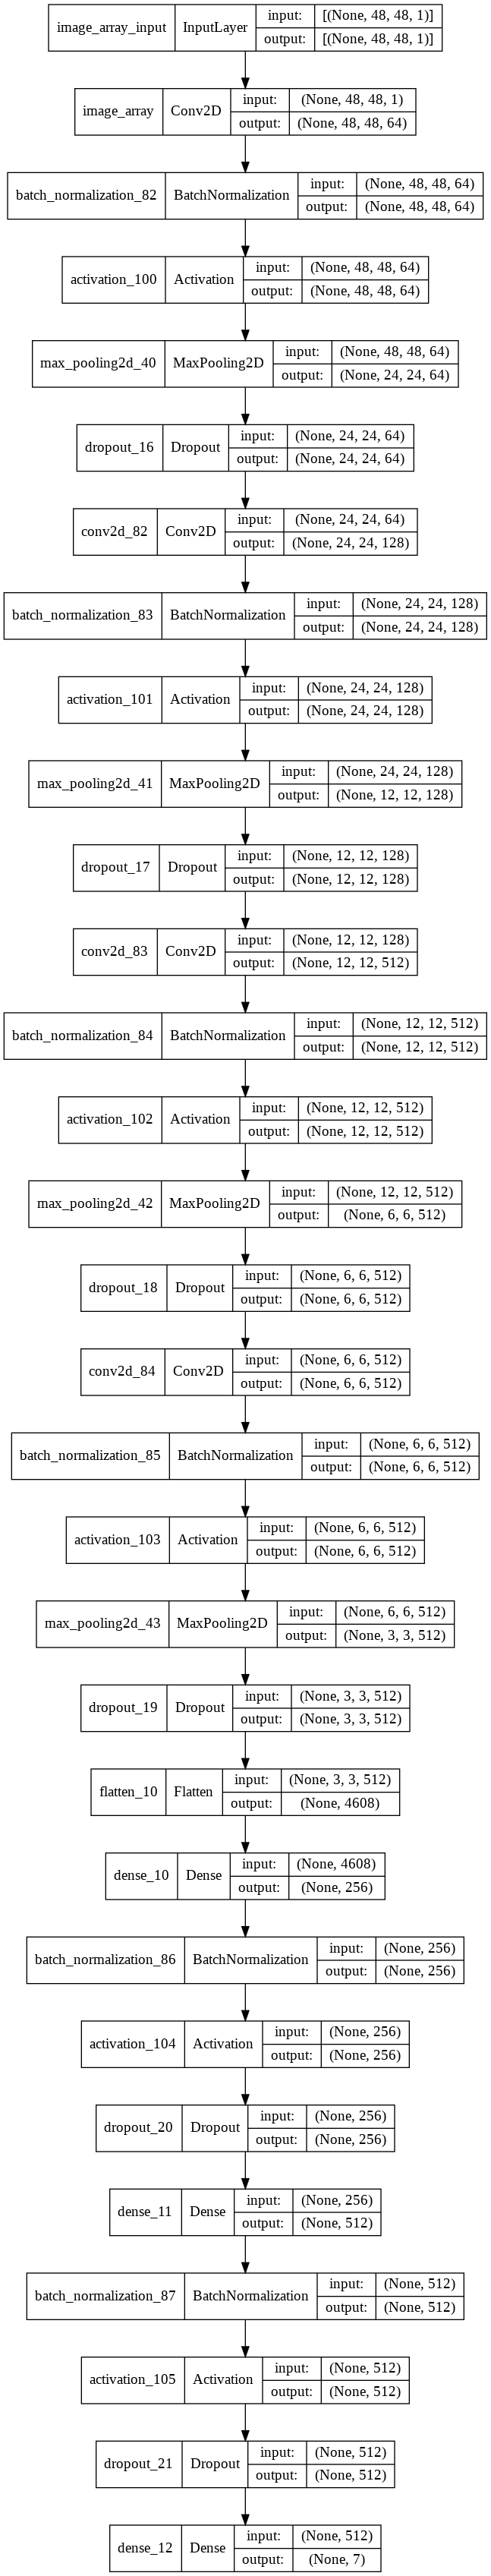

In [ ]:
# Plotting architecture of defined model
plot_model(CNN, to_file='CNN.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Compiling the model
opt = tf.keras.optimizers.Adam(learning_rate=0.001) #using Adam Optimizer
CNN.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
CNN.summary() #gives the information about the architecture and configuration of the neural network.

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image_array (Conv2D)        (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_82 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 activation_100 (Activation)  (None, 48, 48, 64)       0         
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_82 (Conv2D)          (None, 24, 24, 128)      

# **Training**
Xception

In [ ]:
#parameters for training the model
early_stop = EarlyStopping('val_loss', patience=100)
reduce_lr = ReduceLROnPlateau('val_loss', factor=0.1,
                                  patience=50, min_lr=0.00001,model='auto')
trained_models_path = base_path + '_Xception'
model_names = trained_models_path + '.{epoch:02d}-{val_accuracy:.2f}.hdf5'
model_checkpoint = ModelCheckpoint(model_names, 'val_loss', verbose=1,
                                                    save_best_only=True)
callbacks = [model_checkpoint, early_stop, reduce_lr]

In [ ]:
#model history for further evaluation the performance
xception_history =xception.fit(train_datagen.flow(X_train, y_train, batch_size),
          steps_per_epoch=len(X_train) / batch_size, 
          epochs=num_epochs, 
          verbose=1, 
          callbacks=callbacks,
          validation_data=(X_valid,y_valid))

Epoch 1/50
897/897 [============================>.] - ETA: 0s - loss: 1.6968 - accuracy: 0.3192
Epoch 00001: val_loss improved from inf to 3.00373, saving model to models/_Xception.01-0.16.hdf5
897/897 [==============================] - 43s 42ms/step - loss: 1.6968 - accuracy: 0.3193 - val_loss: 3.0037 - val_accuracy: 0.1649 - lr: 0.0010
Epoch 2/50
898/897 [==============================] - ETA: 0s - loss: 1.4887 - accuracy: 0.4226
Epoch 00002: val_loss improved from 3.00373 to 2.18710, saving model to models/_Xception.02-0.27.hdf5
897/897 [==============================] - 41s 45ms/step - loss: 1.4887 - accuracy: 0.4226 - val_loss: 2.1871 - val_accuracy: 0.2729 - lr: 0.0010
Epoch 3/50
898/897 [==============================] - ETA: 0s - loss: 1.3877 - accuracy: 0.4694
Epoch 00003: val_loss improved from 2.18710 to 1.34092, saving model to models/_Xception.03-0.49.hdf5
897/897 [==============================] - 41s 46ms/step - loss: 1.3877 - accuracy: 0.4694 - val_loss: 1.3409 - val_ac

In [ ]:
#save model for the future use  
xception.save('finalxception_model.h5')

# **Dexpression**

In [ ]:
#model parameter for taining the model
early_stop = EarlyStopping('val_loss', patience=100)
reduce_lr = ReduceLROnPlateau('val_loss', factor=0.1,
                                  patience=25, min_lr=0.00001,model='auto')
trained_models_path = base_path + '_DeXpression'
model_names = trained_models_path + '.{epoch:02d}-{val_accuracy:.2f}.hdf5'
model_checkpoint = ModelCheckpoint(model_names, 'val_loss', verbose=1,
                                                    save_best_only=True)
callbacks = [model_checkpoint, early_stop, reduce_lr]

In [ ]:
#model history for the matrics evaluation
dexpression_history =dexpression.fit(train_datagen.flow(X_train, y_train, batch_size),
          steps_per_epoch=len(X_train) / batch_size, 
          epochs=num_epochs, 
          verbose=1, 
          callbacks=callbacks,
          validation_data=(X_valid,y_valid))

Epoch 1/50
898/897 [==============================] - ETA: 0s - loss: 1.8138 - accuracy: 0.2684
Epoch 00001: val_loss improved from inf to 1.69606, saving model to models/_DeXpression.01-0.33.hdf5
897/897 [==============================] - 21s 23ms/step - loss: 1.8138 - accuracy: 0.2684 - val_loss: 1.6961 - val_accuracy: 0.3263 - lr: 0.0010
Epoch 2/50
898/897 [==============================] - ETA: 0s - loss: 1.6947 - accuracy: 0.3197
Epoch 00002: val_loss improved from 1.69606 to 1.59430, saving model to models/_DeXpression.02-0.37.hdf5
897/897 [==============================] - 19s 21ms/step - loss: 1.6947 - accuracy: 0.3197 - val_loss: 1.5943 - val_accuracy: 0.3688 - lr: 0.0010
Epoch 3/50
896/897 [============================>.] - ETA: 0s - loss: 1.6074 - accuracy: 0.3621
Epoch 00003: val_loss improved from 1.59430 to 1.51966, saving model to models/_DeXpression.03-0.40.hdf5
897/897 [==============================] - 20s 22ms/step - loss: 1.6071 - accuracy: 0.3623 - val_loss: 1.5197

In [ ]:
#save model for further use
dexpression.save('finaldexpression_model.h5')

# **CNN**

In [ ]:
#model parameter for taining the model
early_stop = EarlyStopping('val_loss', patience=100)
reduce_lr = ReduceLROnPlateau('val_loss', factor=0.1,
                                  patience=25, min_lr=0.00001,model='auto')
trained_models_path = base_path + '_DeXpression'
model_names = trained_models_path + '.{epoch:02d}-{val_accuracy:.2f}.hdf5'
model_checkpoint = ModelCheckpoint(model_names, 'val_loss', verbose=1,
                                                    save_best_only=True)
callbacks = [model_checkpoint, early_stop, reduce_lr]

In [ ]:
#model history for the matrics evaluation
CNN_history =CNN.fit(train_datagen.flow(X_train, y_train, batch_size),
          steps_per_epoch=len(X_train) / batch_size, 
          epochs=num_epochs, 
          verbose=1, 
          callbacks=callbacks,
          validation_data=(X_valid,y_valid))

Epoch 1/50
896/897 [============================>.] - ETA: 0s - loss: 1.8620 - accuracy: 0.2639
Epoch 00001: val_loss improved from inf to 1.79057, saving model to models/_DeXpression.01-0.30.hdf5
897/897 [==============================] - 26s 27ms/step - loss: 1.8614 - accuracy: 0.2641 - val_loss: 1.7906 - val_accuracy: 0.3046 - lr: 0.0010
Epoch 2/50
896/897 [============================>.] - ETA: 0s - loss: 1.5932 - accuracy: 0.3746
Epoch 00002: val_loss improved from 1.79057 to 1.42664, saving model to models/_DeXpression.02-0.44.hdf5
897/897 [==============================] - 24s 26ms/step - loss: 1.5938 - accuracy: 0.3743 - val_loss: 1.4266 - val_accuracy: 0.4430 - lr: 0.0010
Epoch 3/50
897/897 [============================>.] - ETA: 0s - loss: 1.4500 - accuracy: 0.4398
Epoch 00003: val_loss improved from 1.42664 to 1.31756, saving model to models/_DeXpression.03-0.49.hdf5
897/897 [==============================] - 24s 27ms/step - loss: 1.4500 - accuracy: 0.4398 - val_loss: 1.3176

In [ ]:
# Save best Model
CNN.save('finalcnn_model.h5')

# **Testing**
Plotting accuracy and loss curves

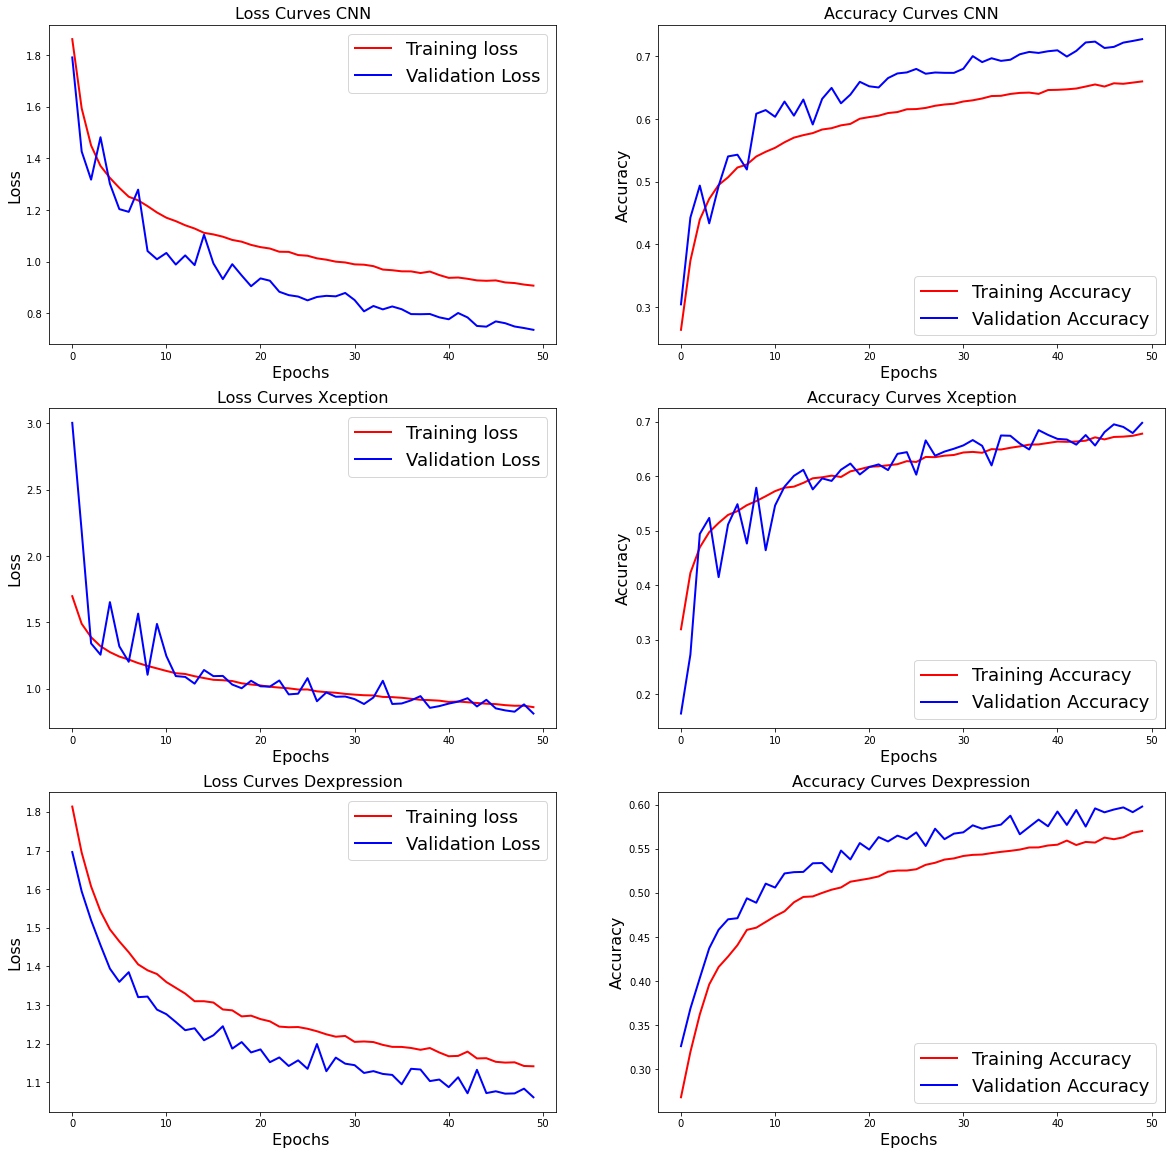

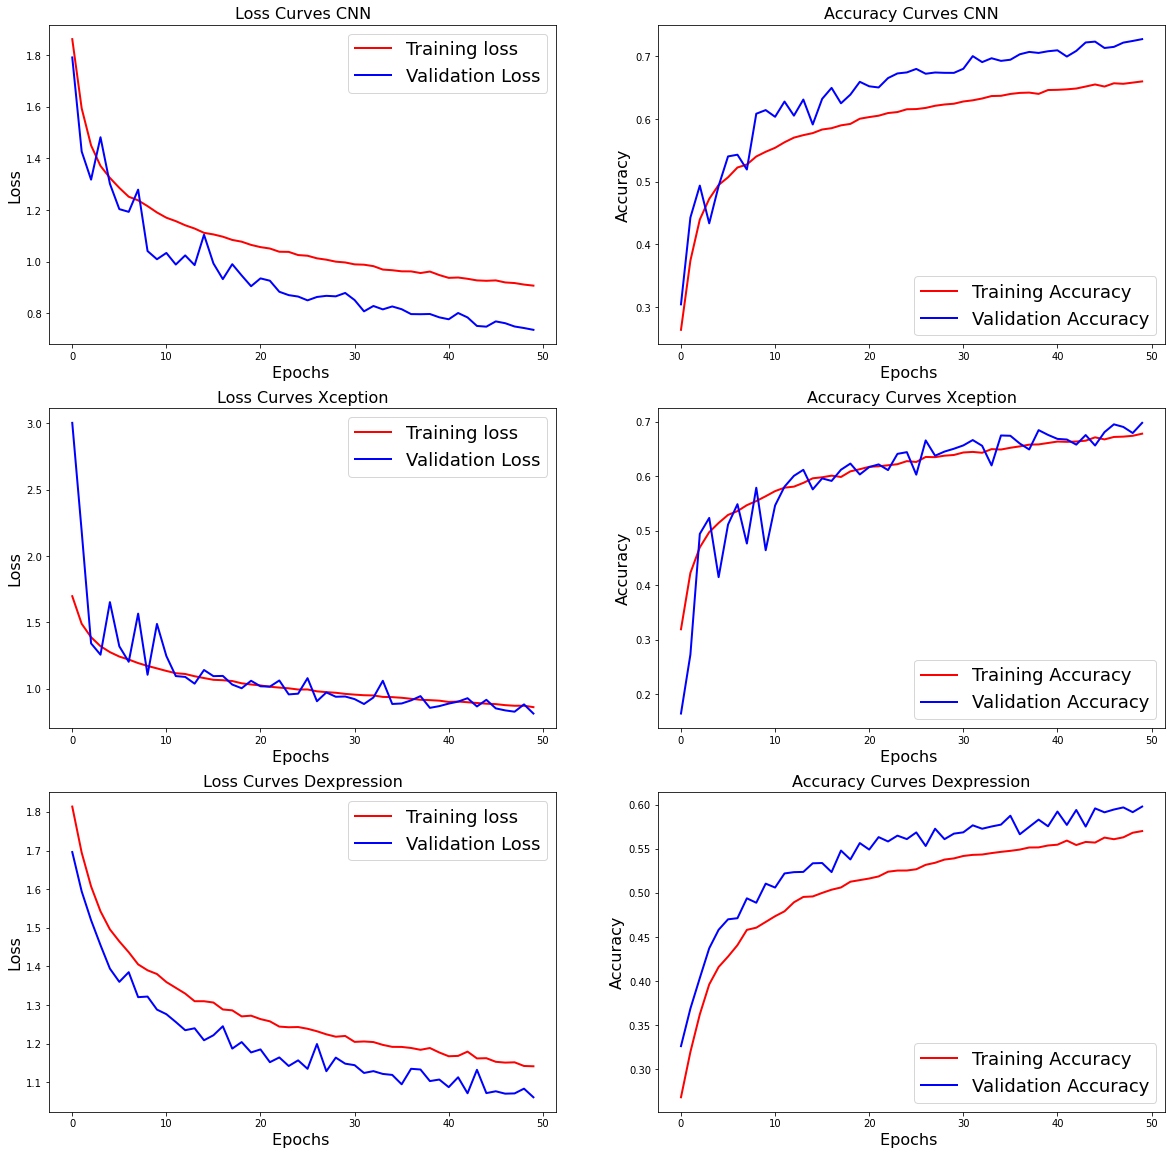

In [ ]:
#for ploting the performance plot for all three model
fig,axes=plt.subplots(3,2,figsize=(20, 20))
for (m,history), ax in zip({'CNN':CNN_history,'Xception':xception_history,'Dexpression':dexpression_history}.items(),axes):
    # Loss Curves
    
    ax[0].plot(history.history['loss'],'r',linewidth=2.0)
    ax[0].plot(history.history['val_loss'],'b',linewidth=2.0)
    ax[0].legend(['Training loss', 'Validation Loss'],fontsize=18)
    ax[0].set_xlabel('Epochs ',fontsize=16)
    ax[0].set_ylabel('Loss',fontsize=16)
    ax[0].set_title('Loss Curves '+m,fontsize=16)
 
    # Accuracy Curves
    ax[1].plot(history.history['accuracy'],'r',linewidth=2.0)
    ax[1].plot(history.history['val_accuracy'],'b',linewidth=2.0)
    ax[1].legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
    ax[1].set_xlabel('Epochs ',fontsize=16)
    ax[1].set_ylabel('Accuracy',fontsize=16)
    ax[1].set_title('Accuracy Curves '+m,fontsize=16)

In [ ]:
#safe the accuracy /loss plot
plt.savefig('plots.png')

<Figure size 432x288 with 0 Axes>

# **Classification reports**

In [ ]:
#classification record of all three model
for model in [CNN,xception,dexpression]:
    ypred=model.predict(X_test)
    ypred_=np.argmax(ypred, axis=1)
    ytest_=np.argmax(y_test, axis=1)
    print(classification_report(ytest_, ypred_,digits=3))

              precision    recall  f1-score   support

           0      0.640     0.688     0.663       968
           1      0.952     0.551     0.698       107
           2      0.689     0.437     0.535       991
           3      0.913     0.892     0.902      1783
           4      0.608     0.597     0.602      1250
           5      0.797     0.865     0.829       792
           6      0.616     0.775     0.687      1287

    accuracy                          0.721      7178
   macro avg      0.745     0.686     0.702      7178
weighted avg      0.727     0.721     0.717      7178

              precision    recall  f1-score   support

           0      0.640     0.688     0.663       968
           1      0.952     0.551     0.698       107
           2      0.689     0.437     0.535       991
           3      0.913     0.892     0.902      1783
           4      0.608     0.597     0.602      1250
           5      0.797     0.865     0.829       792
           6      0.616 

# **Confusion Matrix**

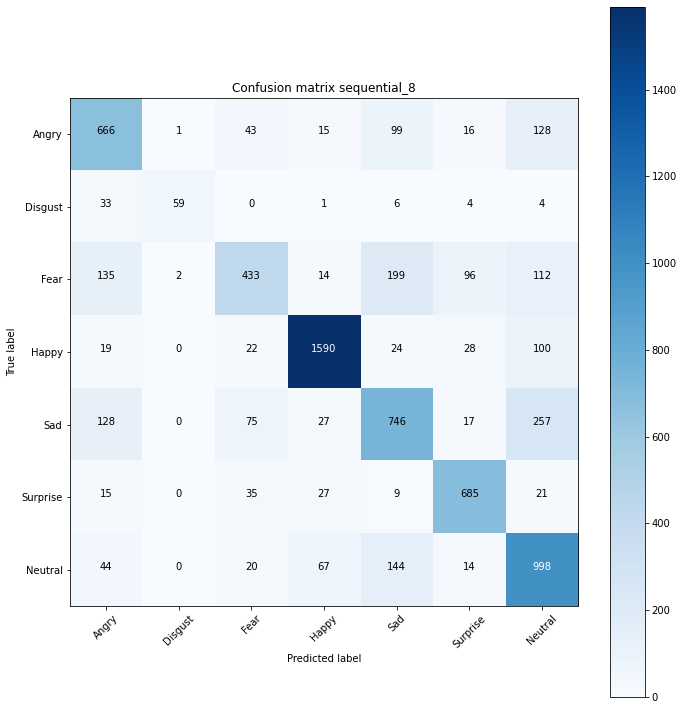

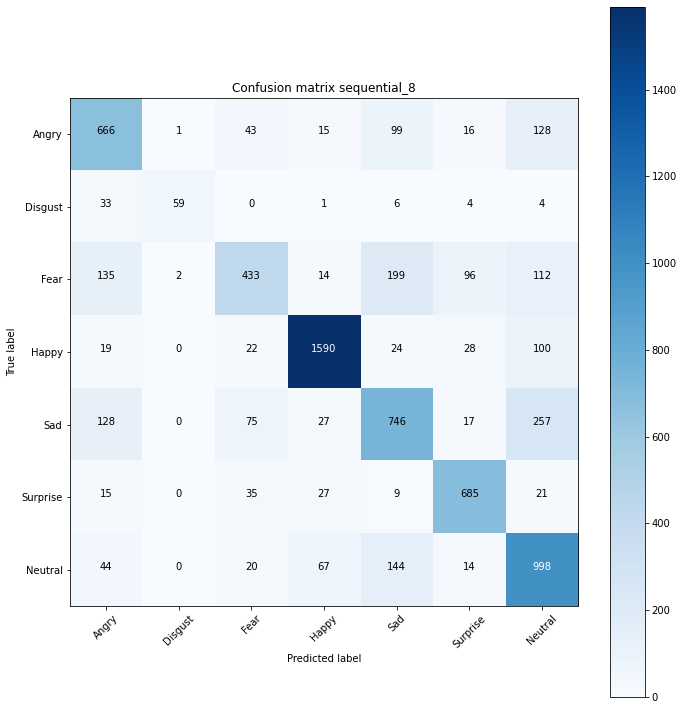

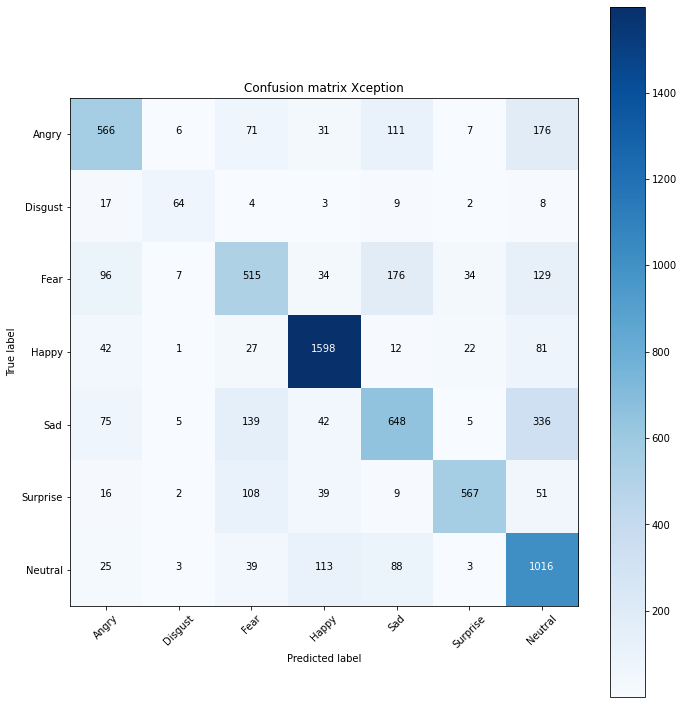

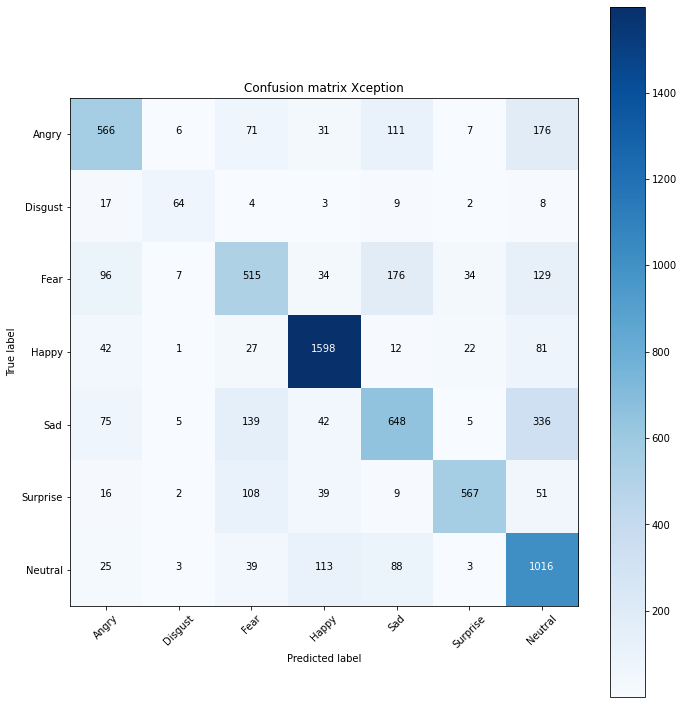

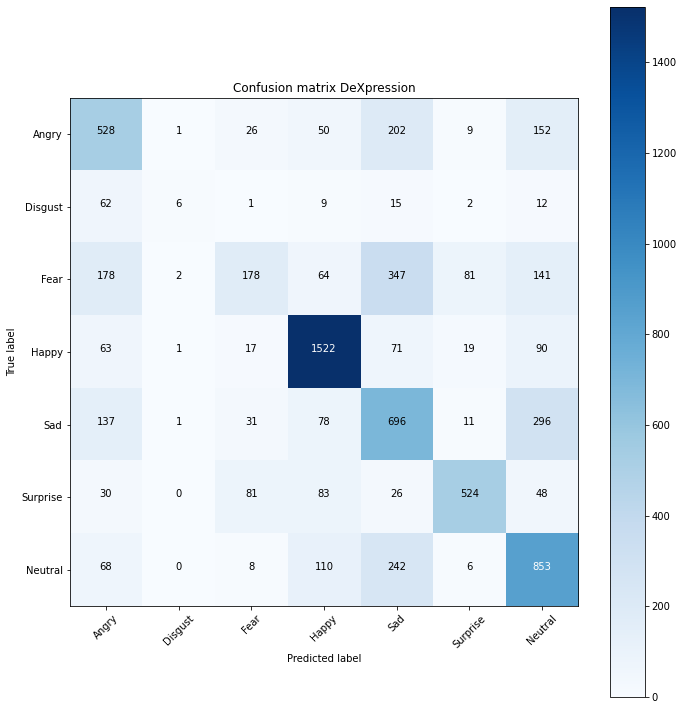

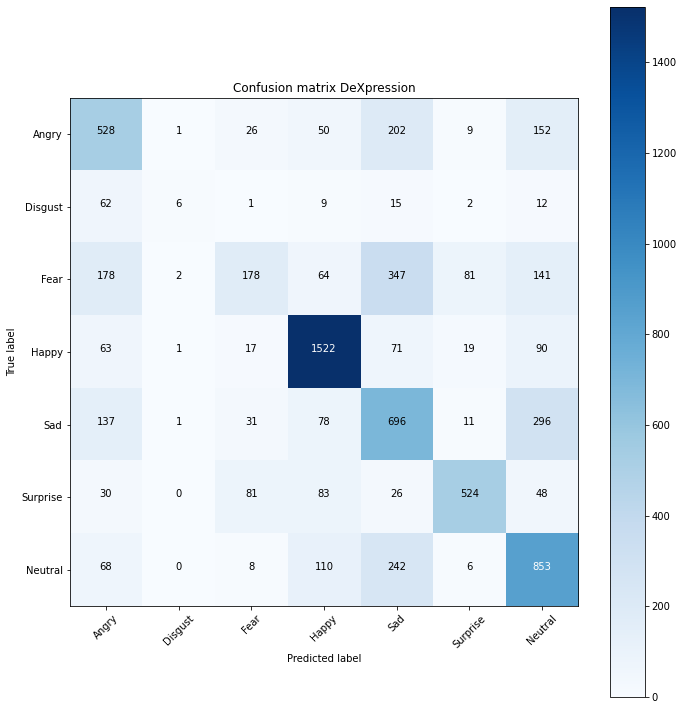

In [ ]:
#confusion matix for all three models
import itertools
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure


for model,i in zip([CNN,xception,dexpression],[1,2,3]):
    fig = figure(figsize=(10, 10))
    
    ypred=model.predict(X_test)
    rounded_predections=np.argmax(ypred, axis=1)
    rounded_labels=np.argmax(y_test, axis=1)
    cm = confusion_matrix(rounded_labels, rounded_predections)
    labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
    title='Confusion matrix '+model.name
    

    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.savefig('confusion_matrix_'+model.name+'.png')
    plt.show()

# **5 :dcnn(ResNet)**

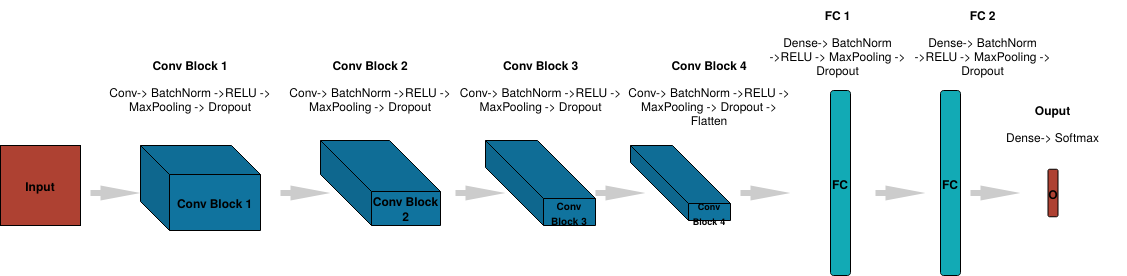

In [ ]:
#function for building the residual network 
def build_net(optim):
    """
    This is a Deep Convolutional Neural Network (DCNN). For generalization purpose I used dropouts in regular intervals.
    I used 'ELU' as the activation because it avoids dying relu problem but also performed well as compared to LeakyRelu
    atleast in this case. 'he_normal' kernel initializer is used as it suits ELU. BatchNormalization is also used for better
    results.
    """
    net = Sequential(name='DCNN')

    net.add(
        Conv2D(
            filters=64,
            kernel_size=(5,5),
            input_shape=(img_width, img_height, img_depth),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_1'
        )
    )
    net.add(BatchNormalization(name='batchnorm_1'))
    net.add(
        Conv2D(
            filters=64,
            kernel_size=(5,5),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_2'
        )
    )
    net.add(BatchNormalization(name='batchnorm_2'))
    
    net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_1'))
    net.add(Dropout(0.4, name='dropout_1'))

    net.add(
        Conv2D(
            filters=128,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_3'
        )
    )
    net.add(BatchNormalization(name='batchnorm_3'))
    net.add(
        Conv2D(
            filters=128,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_4'
        )
    )
    net.add(BatchNormalization(name='batchnorm_4'))
    
    net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_2'))
    net.add(Dropout(0.4, name='dropout_2'))

    net.add(
        Conv2D(
            filters=256,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_5'
        )
    )
    net.add(BatchNormalization(name='batchnorm_5'))
    net.add(
        Conv2D(
            filters=256,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_6'
        )
    )
    net.add(BatchNormalization(name='batchnorm_6'))
    
    net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_3'))
    net.add(Dropout(0.5, name='dropout_3'))

    net.add(Flatten(name='flatten'))
        
    net.add(
        Dense(
            128,
            activation='elu',
            kernel_initializer='he_normal',
            name='dense_1'
        )
    )
    net.add(BatchNormalization(name='batchnorm_7'))
    
    net.add(Dropout(0.6, name='dropout_4'))
    
    net.add(
        Dense(
            num_classes,
            activation='softmax',
            name='out_layer'
        )
    )
    
    net.compile(
        loss='categorical_crossentropy',
        optimizer=optim,
        metrics=['accuracy']
    )
    
    net.summary()
    
    return net

In [ ]:
"""
I used two callbacks one is 'early stopping' for avoiding overfitting training data
and other `ReduceLROnPlateau` for learning rate.
"""

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
]

ImageDataGenerator

horizontal and vertical shift => moving all pixels of image in one direction

width_shift_range ( horizonatal shift)

height_shift_range (vertical shift)

floating num [0- 1] --> % of shift horizontal n vertical flips augmentation ==>reversing rows or cols of pixels --> True or False

Random rotation --> 0 - 360 degrees --> rotation_range = 90 ==> means random rotation to image blw 0 and 90 degrees

random brightness --> randomly darkens or brightens images ==> brightness_range =[0.2,1.0] --> means darkens or brightens if pixel is blw 0.2 and 1 random zoom either adds pixel or subtract pixels in image . [1-value, 1+value] for example , zoom_range = .3 --> range [0.7, 1.3] or blw 70%(zoom in) and 130% (zoomout)

In [ ]:
#epoch call for model training 
batch_size = 32 #batch size of 32 performs the best.
epochs = 50 
optims = [
    optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name='Nadam'),
    optimizers.Adam(0.001),
]

# I tried both `Nadam` and `Adam`, the difference in results is not different but I finally went with Nadam as it is more popular.
model = build_net(optims[1]) 
history = model.fit_generator(
    train_datagen.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_valid, y_valid),
    steps_per_epoch=len(X_train) / batch_size,
    epochs=epochs,
    callbacks=callbacks,
    use_multiprocessing=True
)

Model: "DCNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        1664      
                                                                 
 batchnorm_1 (BatchNormaliza  (None, 48, 48, 64)       256       
 tion)                                                           
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 64)        102464    
                                                                 
 batchnorm_2 (BatchNormaliza  (None, 48, 48, 64)       256       
 tion)                                                           
                                                                 
 maxpool2d_1 (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0      

In [ ]:
#model save into json formate 
model_yaml = model.to_json()
with open("model.yaml", "w") as yaml_file:
     yaml_file.write(model_yaml)
    
model.save("fmodel.h5")

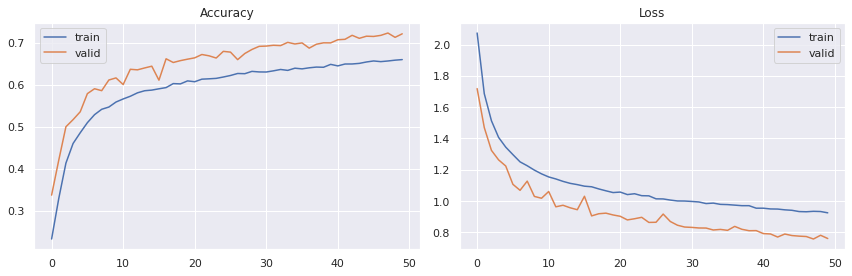

In [ ]:
#plot for the model accuracy score
sns.set()
fig = pyplot.figure(0, (12, 4))

ax = pyplot.subplot(1, 2, 1)
sns.lineplot(history.epoch, history.history['accuracy'], label='train')
sns.lineplot(history.epoch, history.history['val_accuracy'], label='valid')
pyplot.title('Accuracy')
pyplot.tight_layout()

ax = pyplot.subplot(1, 2, 2)
sns.lineplot(history.epoch, history.history['loss'], label='train')
sns.lineplot(history.epoch, history.history['val_loss'], label='valid')
pyplot.title('Loss')
pyplot.tight_layout()

pyplot.savefig('epoch_history_dcnn.png')
pyplot.show()

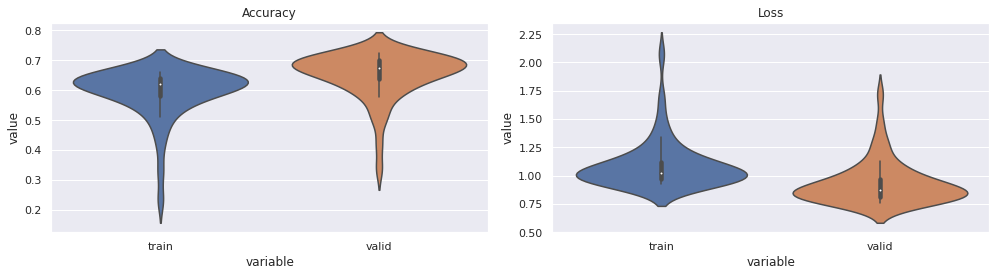

In [ ]:
#train and validation accuracy plot
df_accu = pd.DataFrame({'train': history.history['accuracy'], 'valid': history.history['val_accuracy']})
df_loss = pd.DataFrame({'train': history.history['loss'], 'valid': history.history['val_loss']})

fig = pyplot.figure(0, (14, 4))
ax = pyplot.subplot(1, 2, 1)
sns.violinplot(x="variable", y="value", data=pd.melt(df_accu), showfliers=False)
pyplot.title('Accuracy')
pyplot.tight_layout()

ax = pyplot.subplot(1, 2, 2)
sns.violinplot(x="variable", y="value", data=pd.melt(df_loss), showfliers=False)
pyplot.title('Loss')
pyplot.tight_layout()

pyplot.savefig('performance_dist.png')
pyplot.show()

In [ ]:
# Printing the classification report of all models
for model in [model]:
    ypred=model.predict(X_test)
    ypred_=np.argmax(ypred, axis=1)
    y_test_=np.argmax(y_test, axis=1)
    print(classification_report(y_test_, ypred_,digits=8))

              precision    recall  f1-score   support

           0  0.70079636 0.63636364 0.66702761       968
           1  0.74444444 0.62616822 0.68020305       107
           2  0.66246057 0.42381433 0.51692308       991
           3  0.89035088 0.91082445 0.90047131      1783
           4  0.62018048 0.60480000 0.61239368      1250
           5  0.73298429 0.88383838 0.80137378       792
           6  0.62777425 0.76923077 0.69134078      1287

    accuracy                      0.72067428      7178
   macro avg  0.71128447 0.69357711 0.69567618      7178
weighted avg  0.71965939 0.72067428 0.71415593      7178



# **Confusion Matrix**

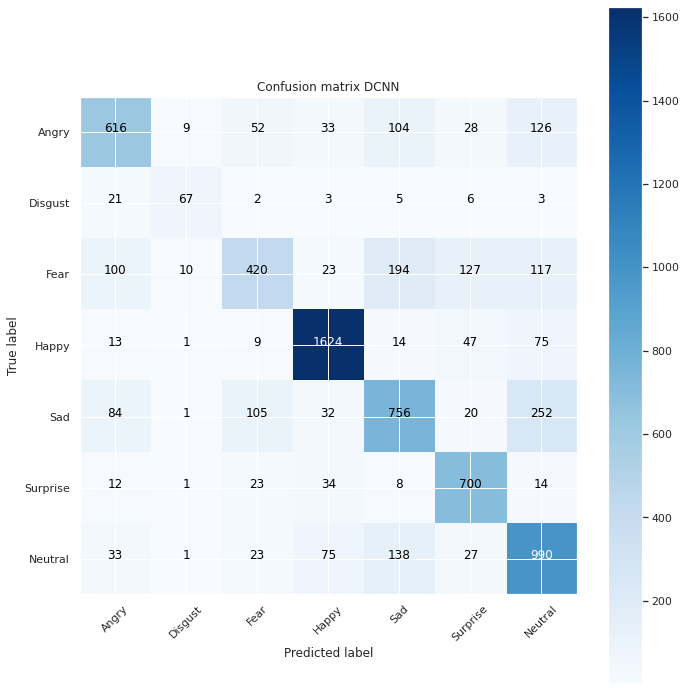

In [ ]:
#for  confusion matix plot
import itertools
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure


for model,i in zip([model],[1]):
    fig = figure(figsize=(10, 10))
    
    ypred=model.predict(X_test)
    rounded_predections=np.argmax(ypred, axis=1)
    rounded_labels=np.argmax(y_test, axis=1)
    cm = confusion_matrix(rounded_labels, rounded_predections)
    labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
    title='Confusion matrix '+model.name
    

    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.savefig('confusion_matrix_'+model.name+'.png')
    plt.show()

In [ ]:
# Save best Model
model.save('final_model.h5')

In [ ]:
# Saving model in json format along with weights
fer_json = model.to_json()  
with open("fer.json", "w") as json_file:  
    json_file.write(fer_json)  
model.save_weights("fer.h5")


In [ ]:
# import dependencies

from IPython.display import display, Javascript, Image,clear_output
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [ ]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
# Defining function to detect face
def face_detect():
  import cv2
  from PIL import Image
  import numpy as np
  import os
  from keras.models import load_model
  from time import sleep
  from keras.preprocessing.image import img_to_array
  from keras.preprocessing import image
# start streaming video from webcam
  video_stream()
# label for video
  label_html = 'Capturing...'
# initialze bounding box to empty
  bbox = ''
  count = 0
  face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml') # Face Detection
  classifier =load_model('/content/final_model.h5')  #Load model
  emotion_labels = ['Angry','Disgust','Fear','Happy','Neutral', 'Sad', 'Surprise'] 

  while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
      break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(0,255,0),2)
      roi_gray = gray[y:y+h,x:x+w]
      roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)  ##Face Cropping for prediction
      if np.sum([roi_gray])!=0:
        roi = roi_gray.astype('float')/255.0
        roi = img_to_array(roi)
        roi = np.expand_dims(roi,axis=0) ## reshaping the cropped face image for prediction
        prediction = classifier.predict(roi)[0]   #Prediction
        label=emotion_labels[prediction.argmax()]
        label_position = (x,y)
        cv2.putText(bbox_array,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)   # Text Adding
      else:
        cv2.putText(bbox_array,'No Faces',(30,80),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)

    



    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

In [ ]:
# Finally detecting the face with live webcam
face_detect()

<IPython.core.display.Javascript object>

# **Conclusion:**
The data preprocessing takes time for processing each image.

The Custom trained CNN model gives training accuracy of 75% and test accuracy of 69% which is pretty good compare to the Xception model.

Since, the emotion counts of disgust and fear images are less therefore on local webcam it hardly detect those emotions.

The codes which are deployed are on my github repository.

It was such an amazing and interesting project. Learnt a lot from this.